In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt

from imp import reload

import qcodes as qc

qc.set_mp_method('spawn')  # force Windows behavior on mac

# this makes a widget in the corner of the window to show and control
# subprocesses and any output they would print to the terminal
qc.show_subprocess_widget()

C:\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>

In [27]:
import qcodes.instrument_drivers
import qcodes.instrument_drivers.rohde_schwarz.ZNB20 as vna; reload(vna)

<module 'qcodes.instrument_drivers.rohde_schwarz.ZNB20' from 'a:\\qcodesfolder\\qcodes\\instrument_drivers\\rohde_schwarz\\ZNB20.py'>

In [28]:
v1 =vna.ZNB20('VNA', 'TCPIP0::172.20.2.234::inst0::INSTR', server_name=None)

Connected to: Rohde-Schwarz ZNB20-2Port (serial:1311601062101551, firmware:2.10) in 0.04s


In [29]:
station = qc.Station(v1)

In [30]:
v1.trace

<qcodes.instrument_drivers.rohde_schwarz.ZNB20.FrequencySweep: trace at 148862512>

In [54]:
v1.trace()

([0.9895826882081791,
  0.9869094348257063,
  0.9857022207845295,
  0.9849716811324213,
  0.9851777067679051,
  0.9842607626269199,
  0.9829348381629962,
  0.9816473088019041,
  0.9786861283846768,
  0.977592036189242,
  0.97576729729163,
  0.9740934018474197,
  0.9729518103133459,
  0.9721370921861145,
  0.9713039723260913,
  0.9709207543511132,
  0.9708230438550919,
  0.9703666979337292,
  0.9703414381126192,
  0.9700908859391326,
  0.9699112711672869,
  0.9694166657814337,
  0.968903093853172,
  0.9682554312580419,
  0.9678450187387361,
  0.9671028614781024,
  0.9664735489036151,
  0.965510156267443,
  0.9649242678857383,
  0.9649892999018361,
  0.9644816933427587,
  0.9641921319025079,
  0.963669775695679,
  0.9631865143768873,
  0.963223910382565,
  0.963030553862949,
  0.9624009542078145,
  0.9622513785770892,
  0.9620348386109799,
  0.961453672750619,
  0.9604823245357286,
  0.9601940834710165,
  0.9594606244612337,
  0.9593216823689693,
  0.9589108029090968,
  0.957887367368323

In [52]:
data1 = qc.Loop(v1.power[-15:-1:1]).each(v1.trace).run(background = False)

DataSet:
   mode     = DataMode.LOCAL
   location = '2016-07-07/14-59-21'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | VNA_power_set | power        | (14,)
   Measured | frequency     | frequency    | (14, 201)
   Measured | VNA_magnitude | magnitude    | (14, 201)
   Measured | VNA_phase     | phase        | (14, 201)
started at 2016-07-07 14:59:22


<IPython.core.display.Javascript object>


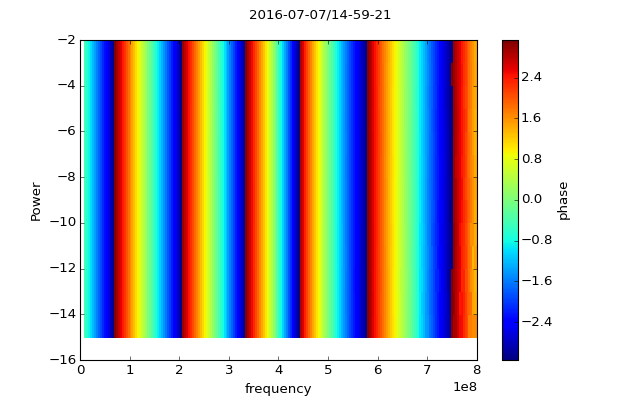

In [55]:
qc.MatPlot(data1.VNA_phase)

<IPython.core.display.Javascript object>


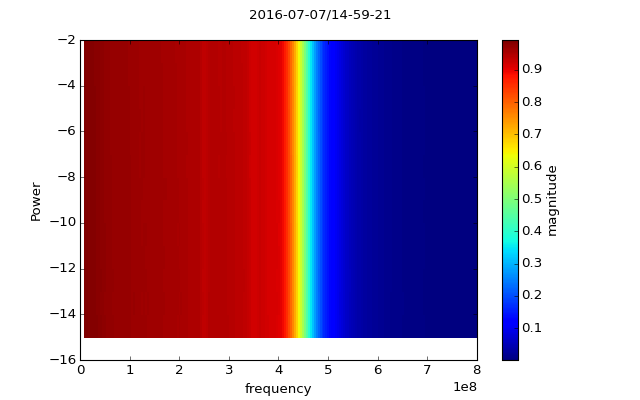

In [53]:
qc.MatPlot(data1.VNA_magnitude)

In [45]:
v1.start(10e6)

In [48]:
v1.stop(800e6)

In [51]:
v1.avg()

1

In [129]:
v1.write('INIT1:IMM; *WAI' )

In [121]:
data_str = v1.ask('CALC:DATA? SDAT')

In [122]:
data_list = list(map(float, data_str.split(',')))

In [34]:
v1.turn_of_cont_meas()

In [154]:
data_mat = list(zip(data_list[0::2], data_list[1::2]))

In [126]:
traces = []
for (re,im) in data_mat:
    mag1 = abs(complex(re, im))
    phase1 = phase(complex(re, im))
    print(re,im," to ",mag1, phase1)
    traces.append([mag1, phase1])

In [136]:
v1.amplitude()

In [157]:
v1.write('INIT:CONT OFF ')

'0.9967593229,0.03166811632,-0.03976883021,-0.03254892426,3.515171594E-005,-0.0001013354638,0.001371747406,-0.002513081079,0.005360152205,-0.01122935928\n'

In [127]:
plot = qc.MatPlot(traces[:1])

[(0.9980101936, 0.03449084933),
 (0.9641232944, -0.1213525732),
 (0.9248047657, -0.253683769),
 (0.8631088671, -0.3821524867),
 (0.7765176241, -0.5179126722),
 (0.6516295863, -0.6518508877),
 (0.4707415258, -0.7801893909),
 (0.2133278849, -0.8747052387),
 (-0.1444192816, -0.8694090008),
 (-0.6079639833, -0.6081981622),
 (-0.5259448106, 0.1256445127),
 (-0.1245919546, 0.1206358877),
 (-0.04073624121, 0.05114137597),
 (-0.01802634779, 0.01942325159),
 (-0.009734638868, 0.007374580748),
 (-0.00563669243, 0.002919718603),
 (-0.003126456651, 0.0007224661367),
 (-0.001839044218, -0.0001187855554),
 (-0.001069454326, -0.0004367482394),
 (-0.0005561144088, -0.0004629771972),
 (-0.0002541690981, -0.0004597777478),
 (-6.401986493e-05, -0.0003409592888),
 (3.314289095e-05, -0.0002256498453),
 (6.505407182e-05, -7.483131476e-05),
 (1.981642895e-05, 4.917745824e-05),
 (-0.0001010966358, 0.0001254573161),
 (-0.0002549673197, 0.0001475966549),
 (-0.0004496216418, 2.364507757e-05),
 (-0.0005684190948,

0.9964303855 0.03377940542  to  0.9970027890523714 0.033887439234905545
0.8005660578 0.4470614809  to  0.9169351016325714 0.5092936445971352
0.08828613099 -0.1743295848  to  0.19541045279545263 -1.1020161360185385
0.001645582064 0.002065456146  to  0.0026408425588072596 0.8980610027115769
-0.0001393377 -0.0002059507605  to  0.00024865781787793915 -2.16561576875015
-0.0003994069521 -0.0002943489047  to  0.0004961523869577787 -2.5064863374653297
0.0006753451163 0.001144215773  to  0.0013286537401792267 1.0375950970589316
-0.0008418207931 -0.00325799023  to  0.0033649907260601725 -1.8236524874871223
-0.0007194921009 0.005871863938  to  0.005915780167454024 1.6927207027838773
0.005368864656 -0.01125694212  to  0.012471706121757204 -1.1257678578809165


(0.9964303855+0.03377940542j)

0.033887439234905545